# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing the Data for SVM Implementation

In [3]:
df=pd.read_csv('C:/Users/aksin52/Documents/Learnbay Stats ML Curriculum/Churn_Modelling.csv')

# Checking the data

In [4]:
df.shape

(10000, 14)

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

# Setting Display options to ensure feature name visibility

In [7]:
pd.set_option('display.max_columns',None)

# Warning Suppression 

In [8]:
import warnings
warnings.filterwarnings('ignore')

# How many rows have missing ID ?

In [9]:
df['CustomerId'].isnull().sum()

0

# Drop ID Feature from the dataset

In [10]:
df=df.drop(['CustomerId','RowNumber','Surname'],axis=1)

# Defining Target and Independent Features

In [11]:
Y=df[['Exited']]
X=df.drop(['Exited'],axis=1)

# Get the Response Rate

In [12]:
Y.mean()

Exited    0.2037
dtype: float64

# Split features into Numerical and Categorical

In [13]:
num=X.select_dtypes(include="number")
char=X.select_dtypes(include="object")

# Outlier Analysis of Numerical Features

In [14]:
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000
1%,432.000000,21.000000,0.000000,0.000000,1.000000,0.00000,0.000000,1842.825300
5%,489.000000,25.000000,1.000000,0.000000,1.000000,0.00000,0.000000,9851.818500
10%,521.000000,27.000000,1.000000,0.000000,1.000000,0.00000,0.000000,20273.580000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500


# Capping and Flooring of outliers

In [15]:
def outlier_cap(x):
    x=x.clip(lower=x.quantile(0.01))
    x=x.clip(upper=x.quantile(0.99))
    return(x)

In [16]:
num=num.apply(lambda x : outlier_cap(x))

In [17]:
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,650.743200,38.89760,5.012800,76369.720704,1.524200,0.70550,0.515100,100089.576990
std,96.115361,10.31522,2.892174,62172.016053,0.560933,0.45584,0.499797,57477.436802
min,432.000000,21.00000,0.000000,0.000000,1.000000,0.00000,0.000000,1842.825300
1%,432.000000,21.00000,0.000000,0.000000,1.000000,0.00000,0.000000,1843.235853
5%,489.000000,25.00000,1.000000,0.000000,1.000000,0.00000,0.000000,9851.818500
10%,521.000000,27.00000,1.000000,0.000000,1.000000,0.00000,0.000000,20273.580000
25%,584.000000,32.00000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000
50%,652.000000,37.00000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000
75%,718.000000,44.00000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500


# Missing Value Analysis

In [18]:
num.isnull().mean()

CreditScore        0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
dtype: float64

# Missing Value Handling - Numerical Features (Remove >25% Missing Rows)

In [19]:
num=num.loc[:,num.isnull().mean()<=0.25]

# Missing Value Handling - Numerical Features (Imputation with Mean)

In [20]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan, strategy='mean')
num_1=pd.DataFrame(imputer.fit_transform(num),index=num.index,columns=num.columns)

In [21]:
num_1.isna().sum()

CreditScore        0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

# Missing Value Handling - Categorical Features (Remove >25% Missing Rows)

In [22]:
char=char.loc[:,char.isnull().mean()<=0.25]

# Missing Value Handling - Categorical Features (Imputation with Mode)

In [23]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan, strategy='most_frequent')
char_1=pd.DataFrame(imputer.fit_transform(char),index=char.index,columns=char.columns)

In [24]:
char_1.isnull().mean()

Geography    0.0
Gender       0.0
dtype: float64

# Feature Selection for Numerical

In [25]:
#KBins
from sklearn.preprocessing import KBinsDiscretizer
Bins=KBinsDiscretizer(n_bins=30,encode='ordinal',strategy='quantile')
X_binned=pd.DataFrame(Bins.fit_transform(num_1),index=num_1.index, columns=num_1.columns).add_suffix('_Bin')
X_binned.describe()

,CreditScore_Bin,Age_Bin,Tenure_Bin,Balance_Bin,NumOfProducts_Bin,HasCrCard_Bin,IsActiveMember_Bin,EstimatedSalary_Bin
count,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.0,10000.0,10000.000000
mean,14.535000,12.525300,4.96380,6.334200,0.491600,0.0,0.0,14.500900
std,8.655361,7.098324,2.81469,6.498872,0.499954,0.0,0.0,8.657199
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.000000
25%,7.000000,7.000000,3.00000,0.000000,0.000000,0.0,0.0,7.000000
50%,15.000000,12.000000,5.00000,4.500000,0.000000,0.0,0.0,14.500000
75%,22.000000,18.000000,7.00000,12.000000,1.000000,0.0,0.0,22.000000
max,29.000000,25.000000,9.00000,19.000000,1.000000,0.0,0.0,29.000000


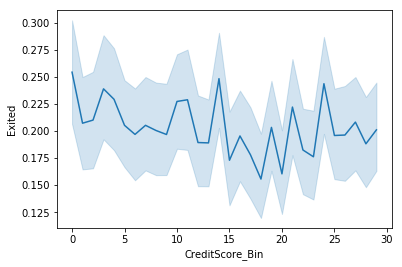

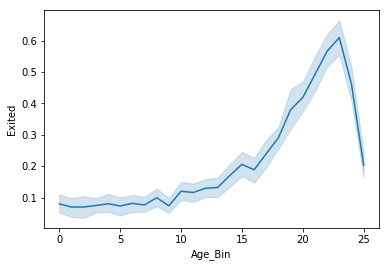

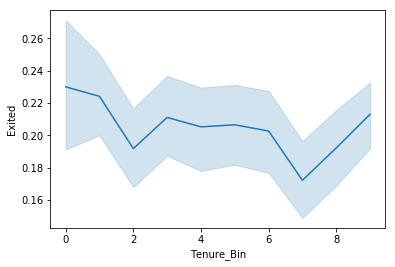

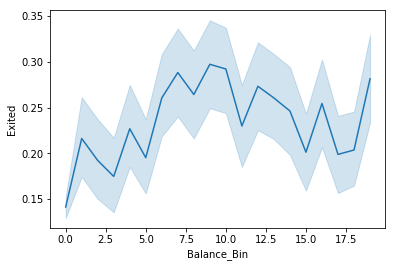

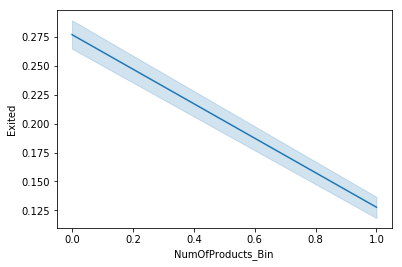

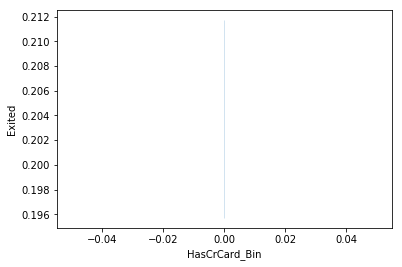

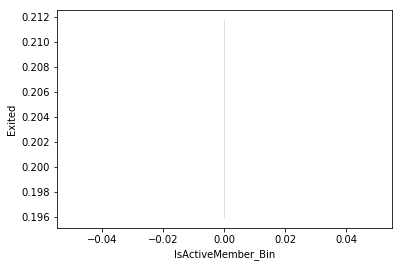

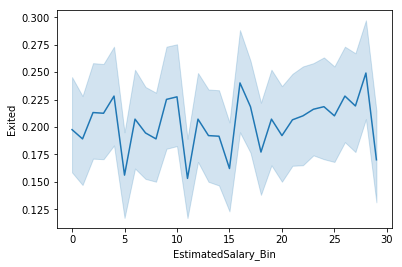

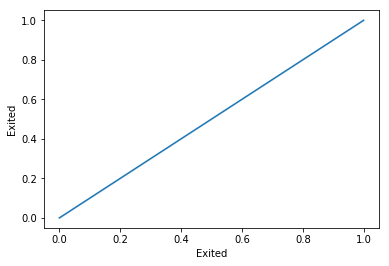

In [26]:
#Plotting
X_binned=pd.concat([X_binned,Y],axis=1,join="inner")
import matplotlib.pyplot as plt
from numpy import mean
for col in (X_binned.columns):
    plt.figure()
    ax=sns.lineplot(x=col,y='Exited',data=X_binned,estimator=mean)
    plt.show()

# Feature Selection for Categorical

In [27]:
#Plotting

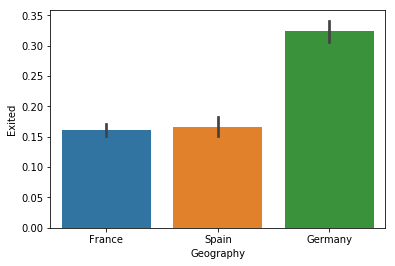

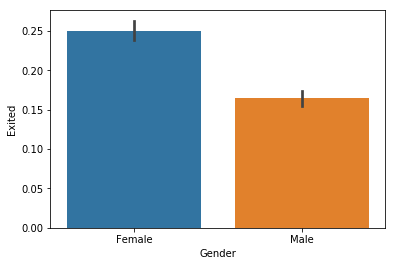

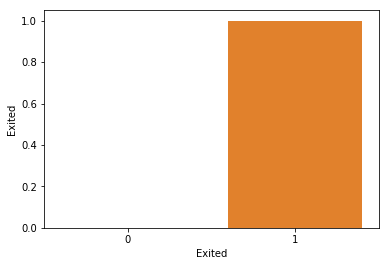

In [28]:
char_binned=pd.concat([char_1,Y],axis=1,join="inner")
import matplotlib.pyplot as plt
from numpy import mean
for col in (char_binned.columns):
    plt.figure()
    ax=sns.barplot(x=col,y='Exited',data=char_binned,estimator=mean)
    plt.show()

# Encode Categorical Features

In [29]:
# Create dummy features with n-1 levels
X_char_dum = pd.get_dummies(char_1, drop_first = True)
X_char_dum.shape

(10000, 3)

# Creating the Master Feature Set for Model Development

In [30]:
X_all=pd.concat([X_char_dum,num_1],axis=1,join="inner")

In [31]:
# Scale the data to be between -1 and 1
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#X_std=pd.DataFrame(scaler.fit_transform(X_all),index=X_all.index,columns=X_all.columns).add_suffix('_std')
#X_std.head()

In [32]:
Y['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

# Train Test Split

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_all, Y, test_size=0.3, random_state=42)

In [34]:
print("Shape of Training Data",X_train.shape)
print("Shape of Testing Data",X_test.shape)
print("Response Rate in Training Data",y_train.mean())
print("Response Rate in Testing Data",y_test.mean())

Shape of Training Data (7000, 11)
Shape of Testing Data (3000, 11)
Response Rate in Training Data Exited    0.207571
dtype: float64
Response Rate in Testing Data Exited    0.194667
dtype: float64


In [ ]:
svm= SVC(C=0.2,kernel='linear')
svm.fit(X_train,y_train)

param_dist = {
 'C': (np.arange(0.1,1,0.1)) , 'kernel': ['linear'],
 'C': (np.arange(0.1,1,0.1)) , 'gamma': [0.01,0.02,0.03,0.04,0.05], 'kernel': ['rbf'],
 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05], 'C':(np.arange(0.1,1,0.1)) , 'kernel':['poly']
                   }

#from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import GridSearchCV
svm_model = GridSearchCV(svm, param_dist,cv=10,scoring='accuracy',n_jobs=-1)
print('Best Parameters using grid search: \n', svm_model.best_params_)

In [36]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [47]:
y_pred_svm=svm.predict(X_test)

In [48]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_svm))
print("Precision",metrics.precision_score(y_test,y_pred_svm))
print("Recall",metrics.recall_score(y_test,y_pred_svm))
print("f1_score",metrics.f1_score(y_test,y_pred_svm))

Accuracy: 0.803
Precision 0.49413735343383586
Recall 0.5051369863013698
f1_score 0.49957662997459773


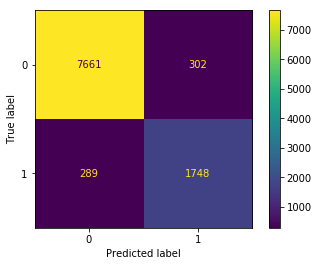

In [49]:
metrics.plot_confusion_matrix(svm,X_all,Y)

In [ ]:
# Lorenz Curve

In [50]:
y_pred_prob = svm.predict_proba(X_all)[:, 1]
df['pred_prob']=pd.DataFrame(y_pred_prob)
df['P_Rank_xgb']=pd.qcut(df['pred_prob'].rank(method='first').values,10,duplicates='drop').codes+1
rank_df_actuals=df.groupby('P_Rank_xgb')['Exited'].agg(['count','mean'])
rank_df_predicted=df.groupby('P_Rank_xgb')['pred_prob'].agg(['mean'])
rank_df_actuals=pd.DataFrame(rank_df_actuals)

rank_df_actuals.rename(columns={'mean':'Actutal_event_rate'},inplace=True)
rank_df_predicted=pd.DataFrame(rank_df_predicted)
rank_df_predicted.rename(columns={'mean':'Predicted_event_rate'},inplace=True)
rank_df=pd.concat([rank_df_actuals,rank_df_predicted],axis=1,join="inner")

sorted_rank_df=rank_df.sort_values(by='P_Rank_xgb',ascending=False)
sorted_rank_df['N_events']=rank_df['count']*rank_df['Actutal_event_rate']
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum()
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()

sorted_rank_df['N_non_events']=sorted_rank_df['count']-sorted_rank_df['N_events']
sorted_rank_df['cum_non_events']=sorted_rank_df['N_non_events'].cumsum()
sorted_rank_df['non_event_cap']=sorted_rank_df['N_non_events']/max(sorted_rank_df['N_non_events'].cumsum())
sorted_rank_df['cum_non_event_cap']=sorted_rank_df['non_event_cap'].cumsum()

sorted_rank_df['KS']=round((sorted_rank_df['cum_event_cap']-sorted_rank_df['cum_non_event_cap']),4)

sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum())
sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum()
sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['Decile']=sorted_reindexed.index+1
sorted_reindexed

,P_Rank_xgb,count,Actutal_event_rate,Predicted_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap,KS,random_cap,cum_random_cap,Decile
0,10,1000,0.845,1.00,845.0,845.0,0.414826,0.414826,155.0,155.0,0.019465,0.019465,0.3954,0.1,0.1,1
1,9,1000,0.860,1.00,860.0,1705.0,0.422189,0.837015,140.0,295.0,0.017581,0.037046,0.8000,0.1,0.2,2
2,8,1000,0.073,0.05,73.0,1778.0,0.035837,0.872852,927.0,1222.0,0.116413,0.153460,0.7194,0.1,0.3,3
3,7,1000,0.033,0.00,33.0,1811.0,0.016200,0.889053,967.0,2189.0,0.121437,0.274896,0.6142,0.1,0.4,4
4,6,1000,0.052,0.00,52.0,1863.0,0.025528,0.914580,948.0,3137.0,0.119051,0.393947,0.5206,0.1,0.5,5
5,5,1000,0.035,0.00,35.0,1898.0,0.017182,0.931762,965.0,4102.0,0.121185,0.515132,0.4166,0.1,0.6,6
6,4,1000,0.023,0.00,23.0,1921.0,0.011291,0.943054,977.0,5079.0,0.122692,0.637825,0.3052,0.1,0.7,7
7,3,1000,0.041,0.00,41.0,1962.0,0.020128,0.963181,959.0,6038.0,0.120432,0.758257,0.2049,0.1,0.8,8
8,2,1000,0.039,0.00,39.0,2001.0,0.019146,0.982327,961.0,6999.0,0.120683,0.878940,0.1034,0.1,0.9,9
9,1,1000,0.036,0.00,36.0,2037.0,0.017673,1.000000,964.0,7963.0,0.121060,1.000000,0.0000,0.1,1.0,10


In [ ]:
ax = sns.lineplot( x="Decile", y="Actutal_event_rate", data=sorted_reindexed,color='red')
ax = sns.lineplot( x="Decile", y="Predicted_event_rate", data=sorted_reindexed,color='grey')

In [ ]:
ax = sns.lineplot( x="Decile", y="cum_event_cap", data=sorted_reindexed,color='red')
ax = sns.lineplot( x="Decile", y="cum_random_cap", data=sorted_reindexed,color='blue')
ax = sns.lineplot( x="Decile", y="cum_non_event_cap", data=sorted_reindexed,color='green')